In [3]:
from my_functions import *
from constants import *
from neighbour_functions import *
# Import voronoi
from scipy.spatial import voronoi_plot_2d

from tqdm import tqdm

### *Voronoi Plotting*
Below is a bunch of functions for visualizing the different aspects of voronoi from interacting neighbours to vertices and so on. The main function is the plot_cells(), but all the other functions can also be used to check and debug

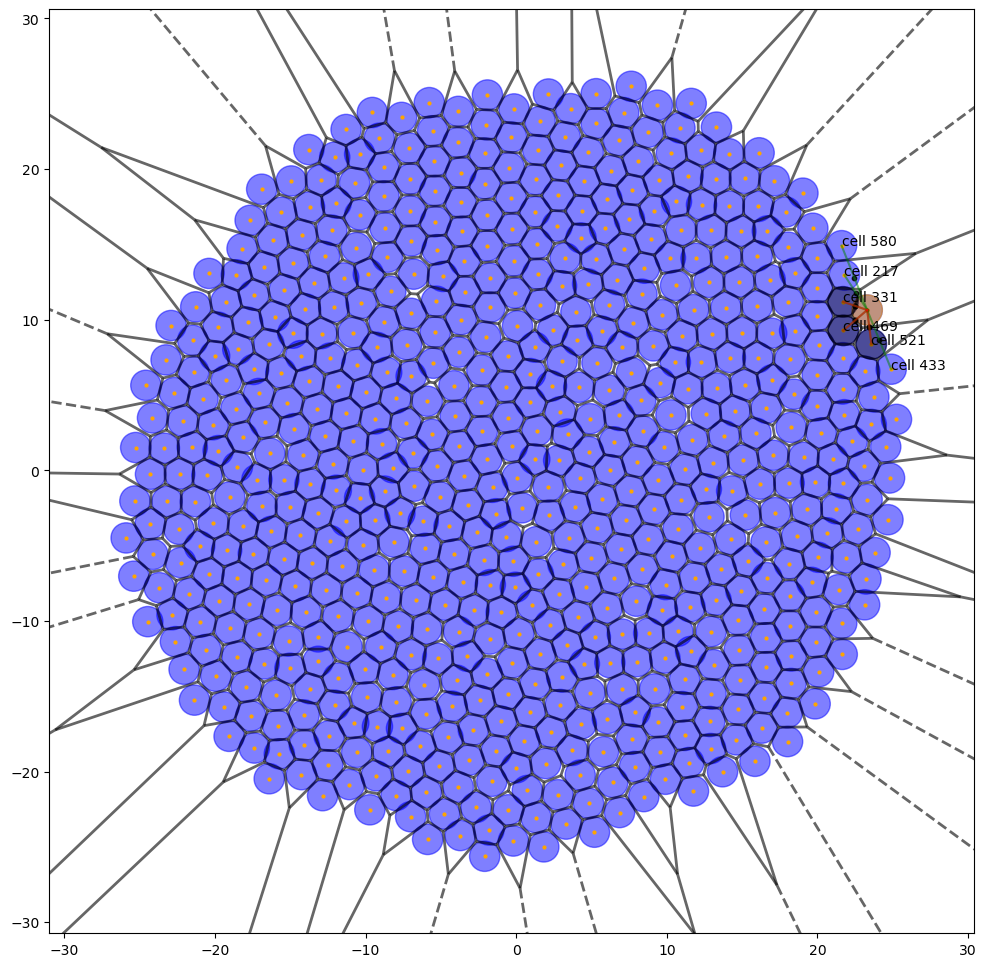

In [7]:
def plot_interaction_line(Voronoi_class, cell_index, neighbours, axis, line_color = "green"):
    """Plots both interaction line and center point between the two points"""
    
    for neighbour in neighbours:
        point1, point2 = Voronoi_class.points[cell_index], Voronoi_class.points[neighbour]
        
        #Calcs center value
        center = (point1 + point2)/2
        
        # Plots the line
        axis.plot([point1[0], point2[0]], [point1[1], point2[1]], color = line_color, alpha = 0.5)
        
        #Plots the center of the interaction line
        axis.scatter(center[0], center[1], marker="o", s = 10, color = "black", alpha = 0.8)
        axis.text(point2[0], point2[1], f"cell {neighbour}")
        
        
def plot_nearest_neighbour(Voronoi_class, cell_index, axis, line_color = "red"):
    """Plots only the nearest neighbours (The difference is very small)"""
    
    nearest_neighbours = get_nearest_neighbours(Voronoi_class.ridge_points, cell_index, Voronoi_class.points)
    
    for neighbour in nearest_neighbours: 
        point1, point2 = Voronoi_class.points[cell_index], Voronoi_class.points[neighbour]
        
        #Calcs center value
        center = (point1 + point2)/2
        
        # Plots the line
        axis.plot([point1[0], point2[0]], [point1[1], point2[1]], color = line_color, alpha = 0.5)
        
        #Plots the center of the interaction line
        axis.scatter(center[0], center[1], marker="o", s = 10, color = "black", alpha = 0.8)
  
  
def show_cell_neighbours(cell_index, vor, axis, color = "black"):
    """Shows the neighbours of a cell"""
    #Plotting the main cell:
    point = vor.points[cell_index]
    circle = plt.Circle((point[0], point[1]), r_cell, color = "orange", alpha = 0.5)
    axis.scatter(point[0], point[1], marker="o", s = 4, color = "black")
    axis.add_patch(circle)
    
    
    # Plotting the interaction lines and nearest neighbours
    neighbours = get_interacting_neighbors(vor.ridge_points, cell_index)
    plot_interaction_line(vor, cell_index, neighbours, axis)
    plot_nearest_neighbour(vor, cell_index, axis)
    
    # Highlighting the nearest neighbours
    nearest_neighbours = get_nearest_neighbours(vor.ridge_points, cell_index, vor.points)
    for neighbour in nearest_neighbours:
        point = vor.points[neighbour]
        circle = plt.Circle((point[0], point[1]), r_cell, color = color, alpha = 0.4)
        axis.add_patch(circle)
       
        
def plot_cells(fig, axis, points, Voronoi, show_voronoi = False, show_vertices = False):
    for i, point in enumerate(points):
        # Plots circles
        circle = plt.Circle((point[0], point[1]), r_cell, color = "blue", alpha = 0.5)
        axis.add_patch(circle)
        
        # Plots points
        axis.scatter(point[0], point[1], marker="o", s = 4, label = f"{i}", color = "orange")
    
    if show_voronoi:
        
        # Generates the voronoi diagram
        voronoi_plot_2d(vor, axis, show_vertices=show_vertices, line_colors='black', line_width=2, line_alpha=0.6, point_size=0)

    
    
    
     
    return None


# Loads the steady state from the interaction_force
steady_state = load_points("SteadyState_625cells_600s_R_25.txt")  
vor = Voronoi(steady_state)

### Actually Plotting ###
fig, axis = plt.subplots(figsize=(12, 12))
axis.set_xlim(screen_size)
axis.set_ylim(screen_size);
axis.set_aspect('equal')

plot_cells(fig, axis, steady_state, vor, show_voronoi=True)

cell_index = 50
show_cell_neighbours(cell_index, vor, axis)